#### 🫀 Predicting Heart Disease

Welcome to this Heart Disease Prediction project! In this notebook, we'll dive into the world of binary classification to build a model that can help determine whether a person is at risk of heart disease or not.

🧠 What Are We Aiming For?
Our goal is not just to build a model — but to build a reliable one. That means our evaluation metrics are just as important as the predictions themselves. Here's what success looks like for us:

    ✅ F1 Score: Targeting 90% or higher — balancing precision and recall effectively.

    🎯 Accuracy: We want the model to be right at least 90% of the time.

    🔍 Recall: Especially important in medical diagnosis — aiming for 90% or more, so we catch as many positive cases as possible.

Let’s get started and see how well our model can perform!

#### 📦 Importing Essential Libraries & EDA Tools

Before we dive into the data, let's make sure we have all the necessary libraries at our fingertips. This includes tools for:

    🔍 Exploratory Data Analysis (EDA)

    📊 Visualization

    🧮 Numerical computations

    🧠 Model building and evaluation

Let’s load them up and get ready to explore the dataset!

In [1]:
%matplotlib inline
###### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###################################

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
###############################################

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
################################################################

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap
from matplotlib.colors import ListedColormap, BoundaryNorm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###############################################

import joblib
from datetime import datetime
################################################

import time
print(f"Last Time Updated: {time.asctime()}")

Last Time Updated: Mon Jun  9 05:59:05 2025


## 📘 Heart Disease Dataset Dictionary

This section outlines the attributes (features) in our dataset and what each one represents. Understanding this is key to proper data exploration and model training.

| S.No | Attribute Name                   | Code in Dataset          | Unit / Values                  | Data Type   | Description                                                                 |
|------|----------------------------------|---------------------------|--------------------------------|-------------|-----------------------------------------------------------------------------|
| 1    | Age                              | `age`                     | Years                          | Numeric     | Age of the individual.                                                     |
| 2    | Sex                              | `sex`                     | 1 = Male, 0 = Female           | Binary      | Biological sex of the individual.                                          |
| 3    | Chest Pain Type                  | `chest_pain_type`         | 1, 2, 3, 4                     | Nominal     | Type of chest pain experienced (see below for details).                    |
| 4    | Resting Blood Pressure           | `resting_bp_s`            | mm Hg                          | Numeric     | Blood pressure when the patient is at rest.                                |
| 5    | Serum Cholesterol                | `cholesterol`             | mg/dl                          | Numeric     | Cholesterol level in the blood.                                            |
| 6    | Fasting Blood Sugar              | `fasting_blood_sugar`     | 1 = True, 0 = False            | Binary      | Whether fasting blood sugar > 120 mg/dl.                                   |
| 7    | Resting Electrocardiogram        | `resting_ecg`             | 0, 1, 2                        | Nominal     | ECG results (see below).                                                   |
| 8    | Maximum Heart Rate Achieved      | `max_heart_rate`          | 71–202 bpm                     | Numeric     | Highest heart rate during exercise.                                        |
| 9    | Exercise Induced Angina          | `exercise_angina`         | 1 = Yes, 0 = No                | Binary      | Chest pain caused by physical activity.                                    |
| 10   | ST Depression (Oldpeak)          | `oldpeak`                 | Depression level               | Numeric     | ST depression induced by exercise relative to rest.                        |
| 11   | Slope of the ST Segment          | `ST_slope`                | 1, 2, 3                        | Nominal     | Direction of the ST segment slope during peak exercise.                   |
| 12   | Target (Presence of Heart Disease)| `target`                 | 1 = Disease, 0 = No Disease    | Binary      | Diagnosis of heart disease (our target variable).                          |

---

### 🧾 Details on Nominal Attributes

#### 🔹 `sex`
- 1 = Male  
- 0 = Female

#### 🔹 `chest_pain_type`
- 1 = Typical Angina  
- 2 = Atypical Angina  
- 3 = Non-anginal Pain  
- 4 = Asymptomatic

#### 🔹 `fasting_blood_sugar`
- 1 = True (FBS > 120 mg/dl)  
- 0 = False

#### 🔹 `resting_ecg`
- 0 = Normal  
- 1 = ST-T Wave Abnormality  
- 2 = Left Ventricular Hypertrophy (by Estes' criteria)

#### 🔹 `exercise_angina`
- 1 = Yes  
- 0 = No

#### 🔹 `ST_slope`
- 1 = Upsloping  
- 2 = Flat  
- 3 = Downsloping

#### 🔹 `target`
- 1 = Heart Disease Present  
- 0 = No Heart Disease


##### LOAD DATA =========

In [2]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df.head(5)

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [3]:
df.shape

(1190, 12)

In [4]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
#### Let us rename the column names for easy workings........

df = df.rename(columns = {
    "chest pain type": "chest_pain_type",
    "resting bp s": "resting_bp_s",
    "fasting blood sugar": "fasting_blood_sugar",
    "resting ecg": "resting_ecg",
    "max heart rate": "max_heart_rate",
    "exercise angina": "exercise_angina",
    "ST slope":"ST_slope"
})

In [6]:
df.head(5)

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [8]:
#### Let us check for duplicate and nan records

df.duplicated().sum()

272

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest_pain_type      918 non-null    int64  
 3   resting_bp_s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting_blood_sugar  918 non-null    int64  
 6   resting_ecg          918 non-null    int64  
 7   max_heart_rate       918 non-null    int64  
 8   exercise_angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST_slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [12]:
df.target.value_counts()

target
1    508
0    410
Name: count, dtype: int64

In [13]:
df.to_csv("cleaned_df.csv", index=False)  
df.head()  

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

#### EXPLORATORY DATA ANALYSIS (EDA) ============

In [14]:
df.target.value_counts()

target
1    508
0    410
Name: count, dtype: int64

In [15]:
plt.style.use("seaborn-v0_8-whitegrid")

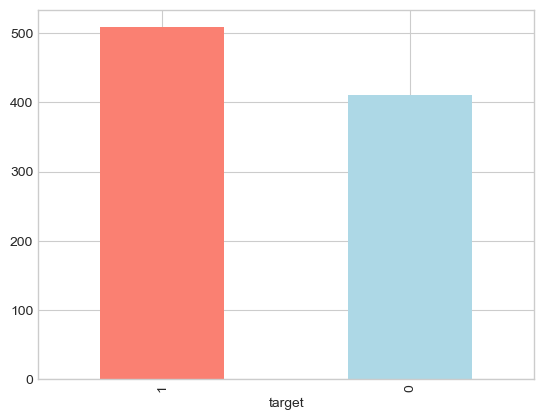

In [16]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest_pain_type      918 non-null    int64  
 3   resting_bp_s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting_blood_sugar  918 non-null    int64  
 6   resting_ecg          918 non-null    int64  
 7   max_heart_rate       918 non-null    int64  
 8   exercise_angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST_slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [18]:
df.describe()

age         sex  chest_pain_type  resting_bp_s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST_slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

In [19]:
##### let us compare two columns (sex column and target column) using the pd.crosstab()

pd.crosstab(df.target, df.sex)

sex       0    1
target          
0       143  267
1        50  458

| `sex`                    | **0 (Female)** | **1 (Male)** |
| ------------------------ | -------------- | ------------ |
| **No Heart Disease (0)** | 143            | 267          |
| **Heart Disease (1)**    | 50             | 458         

🧠 What does this table show?

Females (sex=0)

    143 do not have heart disease.

    50 do have heart disease.

Males (sex=1)

    267 do not have heart disease.

    458 do have heart disease.

#### Insights:
A higher proportion of males in the dataset are diagnosed with heart disease compared to females.

While there are more males overall, the difference in heart disease cases between males and females is significant:

458 males vs 50 females with heart disease.

This insight might suggest that sex could be an important predictive feature for heart disease in your model. |


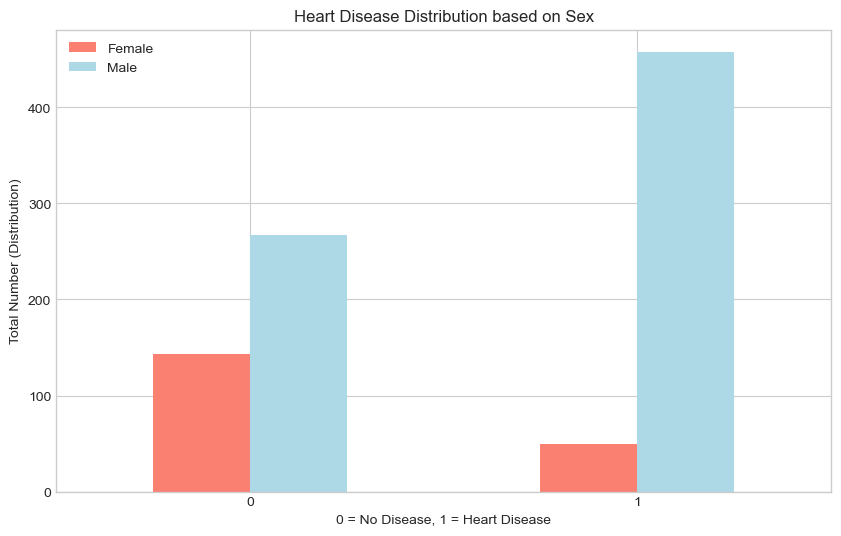

In [20]:
#### let us do some visualization 
crosstab = pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);
plt.title("Heart Disease Distribution based on Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Total Number (Distribution)")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

fig = crosstab.get_figure()
fig.savefig("target_sex_crosstab.png")

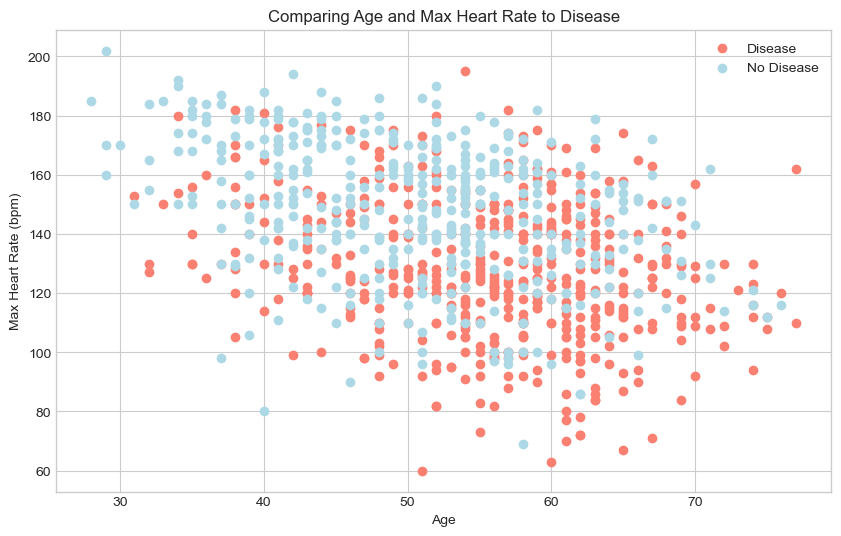

In [21]:
#### Heart Disease with respect to maximum heart rate of patients ========

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1], df.max_heart_rate[df.target == 1], c='salmon');
plt.scatter(df.age[df.target == 0], df.max_heart_rate[df.target == 0], c='lightblue');
plt.title("Comparing Age and Max Heart Rate to Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (bpm)")
plt.legend(['Disease', 'No Disease'])

plt.savefig("age_maxheartrate.png", bbox_inches='tight', dpi=300)
plt.show();

###### 📉 Insight from the Scatter Plot: Max Heart Rate vs Age

From the scatter plot, a few key patterns emerge:

💔 Patients with lower maximum heart rates tend to be more likely diagnosed with heart disease. This suggests that reduced cardiovascular capacity might be a strong indicator of risk.

👥 Most patients fall within the 50–70 age range, making this the most represented age group in the dataset. It's a critical age bracket where heart-related issues appear to be most common.

These observations highlight how age and max heart rate could play a vital role in predicting heart disease.

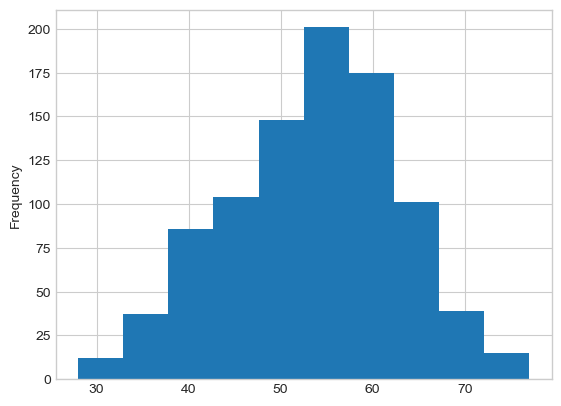

In [22]:
### let us show the age distribution on a histogram =======

df.age.plot.hist();

In [23]:
df.chest_pain_type.value_counts()

chest_pain_type
4    496
3    203
2    173
1     46
Name: count, dtype: int64

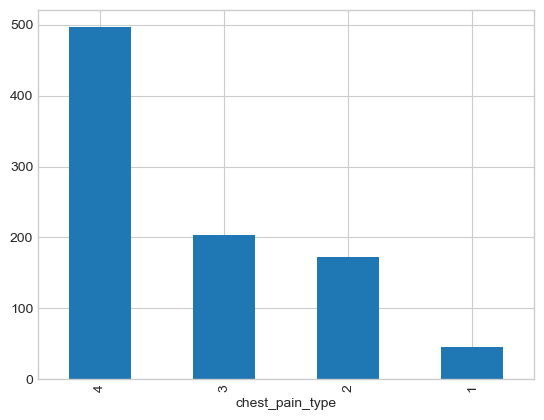

In [24]:
df.chest_pain_type.value_counts().plot(kind='bar');

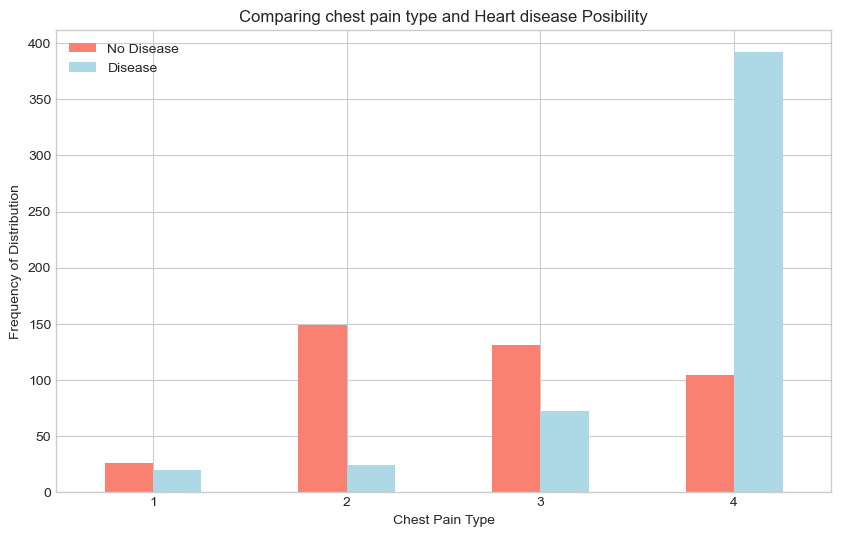

In [25]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title("Comparing chest pain type and Heart disease Posibility")
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency of Distribution')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

plt.savefig('chest_pain_type_to_target.png', bbox_inches='tight', dpi=300)
plt.show();

#### ❤️ Chest Pain Type vs Heart Disease
The data reveals a clear pattern:
💥 Patients with chest pain type 4 (asymptomatic) are the most likely to have heart disease.
This is followed by those with type 3 (non-anginal pain), type 2 (atypical angina), and finally type 1 (typical angina), which is the least associated with heart disease.

This progression suggests that the more atypical or silent the chest pain, the higher the risk of underlying heart issues — especially when symptoms are asymptomatic and may go unnoticed.

In [26]:
#### Correlation matrix =========

df.corr()

age       sex  chest_pain_type  resting_bp_s  \
age                  1.000000  0.055750         0.165896      0.254399   
sex                  0.055750  1.000000         0.168254      0.005133   
chest_pain_type      0.165896  0.168254         1.000000      0.022168   
resting_bp_s         0.254399  0.005133         0.022168      1.000000   
cholesterol         -0.095282 -0.200092        -0.136139      0.100893   
fasting_blood_sugar  0.198039  0.120076         0.116703      0.070193   
resting_ecg          0.213152 -0.018343         0.031383      0.097661   
max_heart_rate      -0.382045 -0.189186        -0.343654     -0.112135   
exercise_angina      0.215793  0.190664         0.416625      0.155101   
oldpeak              0.258612  0.105734         0.245027      0.164803   
ST_slope             0.261760  0.148282         0.317256      0.071477   
target               0.282039  0.305445         0.471354      0.107589   

                     cholesterol  fasting_blood_sugar  resting_ecg  \
age                    -0.095282             0.198039     0.213152   
sex                    -0.200092             0.120076    -0.018343   
chest_pain_type        -0.136139             0.116703     0.031383   
resting_bp_s            0.100893             0.070193     0.097661   
cholesterol             1.000000            -0.260974     0.112095   
fasting_blood_sugar    -0.260974             1.000000     0.050707   
resting_ecg             0.112095             0.050707     1.000000   
max_heart_rate          0.235792            -0.131438     0.048552   
exercise_angina        -0.034166             0.060451     0.036119   
oldpeak                 0.050148             0.052698     0.114428   
ST_slope               -0.110928             0.168627     0.081191   
target                 -0.232741             0.267291     0.061011   

                     max_heart_rate  exercise_angina   oldpeak  ST_slope  \
age                       -0.382045         0.215793  0.258612  0.261760   
sex                       -0.189186         0.190664  0.105734  0.148282   
chest_pain_type           -0.343654         0.416625  0.245027  0.317256   
resting_bp_s              -0.112135         0.155101  0.164803  0.071477   
cholesterol                0.235792        -0.034166  0.050148 -0.110928   
fasting_blood_sugar       -0.131438         0.060451  0.052698  0.168627   
resting_ecg                0.048552         0.036119  0.114428  0.081191   
max_heart_rate             1.000000        -0.370425 -0.160691 -0.341455   
exercise_angina           -0.370425         1.000000  0.408752  0.430044   
oldpeak                   -0.160691         0.408752  1.000000  0.503017   
ST_slope                  -0.341455         0.430044  0.503017  1.000000   
target                    -0.400421         0.494282  0.403951  0.553461   

                       target  
age                  0.282039  
sex                  0.305445  
chest_pain_type      0.471354  
resting_bp_s         0.107589  
cholesterol         -0.232741  
fasting_blood_sugar  0.267291  
resting_ecg          0.061011  
max_heart_rate      -0.400421  
exercise_angina      0.494282  
oldpeak              0.403951  
ST_slope             0.553461  
target               1.000000

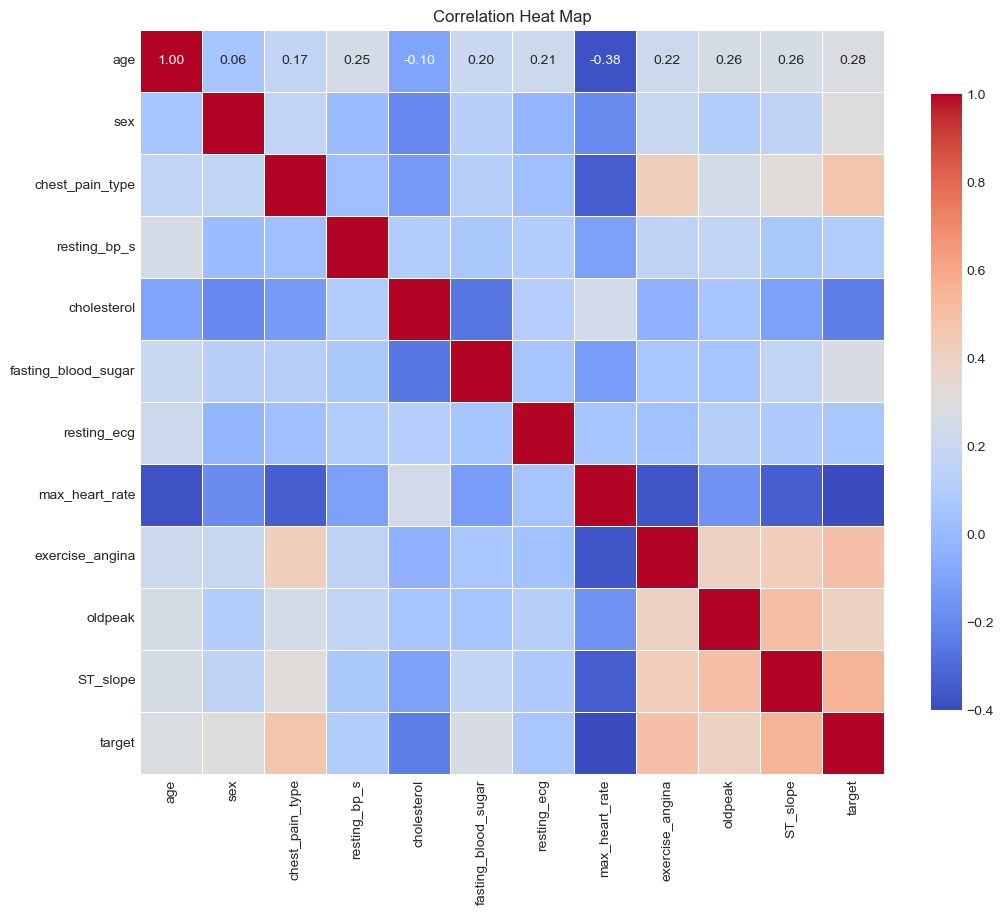

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink':0.8})
plt.title('Correlation Heat Map')
plt.savefig("correlation.png")
plt.show();

In [28]:
######### Creating different subsets of data =============

over_50 = df[df['age'] > 50]
under_50 = df[df['age'] < 50]
male_over_50 = df[(df['age'] > 50) & (df['sex'] == 1)]
female_over_50 = df[(df['age'] > 50) & (df['sex'] == 0)]
disease_over_age_50 = df[(df['age'] > 50) & (df['target'] == 1)]
no_disease_over_age_50 = df[(df['age'] > 50) & (df['target'] == 0)]

over_50_male_disease = df[(df['age'] > 50) & (df['sex'] == 1) & (df['target'] == 1)]
over_50_male_no_disease = df[(df['age'] > 50) & (df['sex'] == 1) & (df['target'] == 0)]

over_50_female_disease = df[(df['age'] > 50) & (df['sex'] == 0) & (df['target'] == 1)]
over_50_female_no_disease = df[(df['age'] > 50) & (df['sex'] == 0) & (df['target'] == 0)]

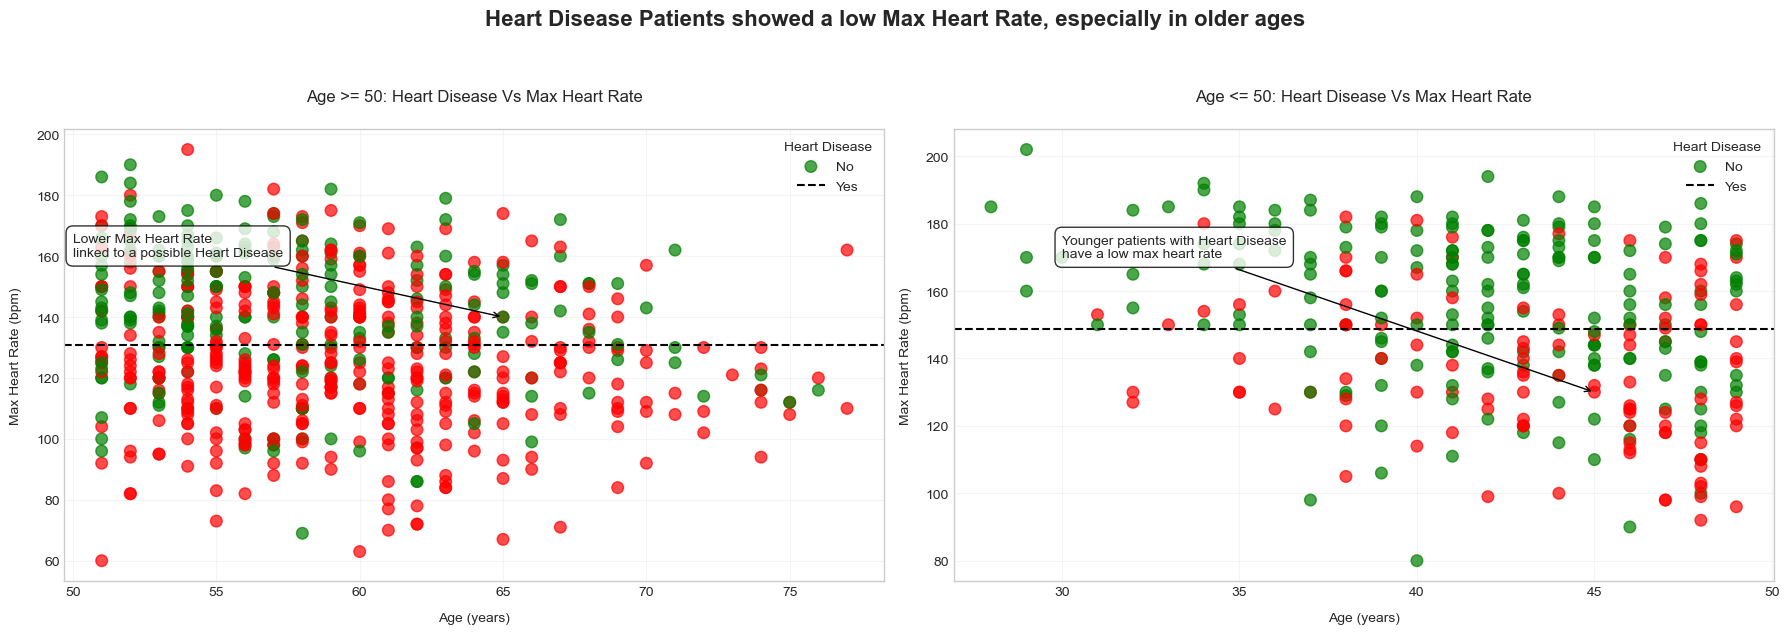

In [29]:
#### Analysing over 50 years of age of our patients ==============

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6))

custom_map = ListedColormap(['green', 'red'])

sc0 = ax0.scatter(x=over_50['age'], y=over_50['max_heart_rate'], c=over_50['target'], cmap=custom_map, alpha=0.7, s=70)
mean_over_50 = over_50['max_heart_rate'].mean()
ax0.axhline(mean_over_50, ls='--', color='black', label=f"Mean: {mean_over_50:.0f}bpm")
ax0.annotate("Lower Max Heart Rate\nlinked to a possible Heart Disease", xy=(65, 140), xytext=(50,160), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='round, pad=0.5', fc='white', alpha=0.8))
ax0.set_title("Age >= 50: Heart Disease Vs Max Heart Rate", pad=20)
ax0.set_ylabel('Max Heart Rate (bpm)', labelpad=10)
ax0.set_xlabel("Age (years)", labelpad=10)
ax0.legend(title='Heart Disease', labels=['No', 'Yes'], loc="upper right")
ax0.grid(alpha=0.2)

sc1 = ax1.scatter(x=under_50['age'], y=under_50['max_heart_rate'], c=under_50['target'], cmap=custom_map, alpha=0.7, s=70)
mean_under_50 = under_50['max_heart_rate'].mean()
ax1.axhline(mean_under_50, ls='--', color='black', label=f"Mean: {mean_under_50:.0f}bpm")
ax1.annotate("Younger patients with Heart Disease\nhave a low max heart rate", xy=(45, 130), xytext=(30,170), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='round, pad=0.5', fc='white', alpha=0.8))
ax1.set_title("Age <= 50: Heart Disease Vs Max Heart Rate", pad=20)
ax1.set_ylabel('Max Heart Rate (bpm)', labelpad=10)
ax1.set_xlabel("Age (years)", labelpad=10)
ax1.legend(title='Heart Disease', labels=['No', 'Yes'], loc="upper right")
ax1.grid(alpha=0.2)

fig.suptitle("Heart Disease Patients showed a low Max Heart Rate, especially in older ages", fontsize=16, y=1.05, weight='bold')
plt.tight_layout()
plt.savefig("Heart_rate_insight.png", dpi=300, bbox_inches='tight')

plt.show();

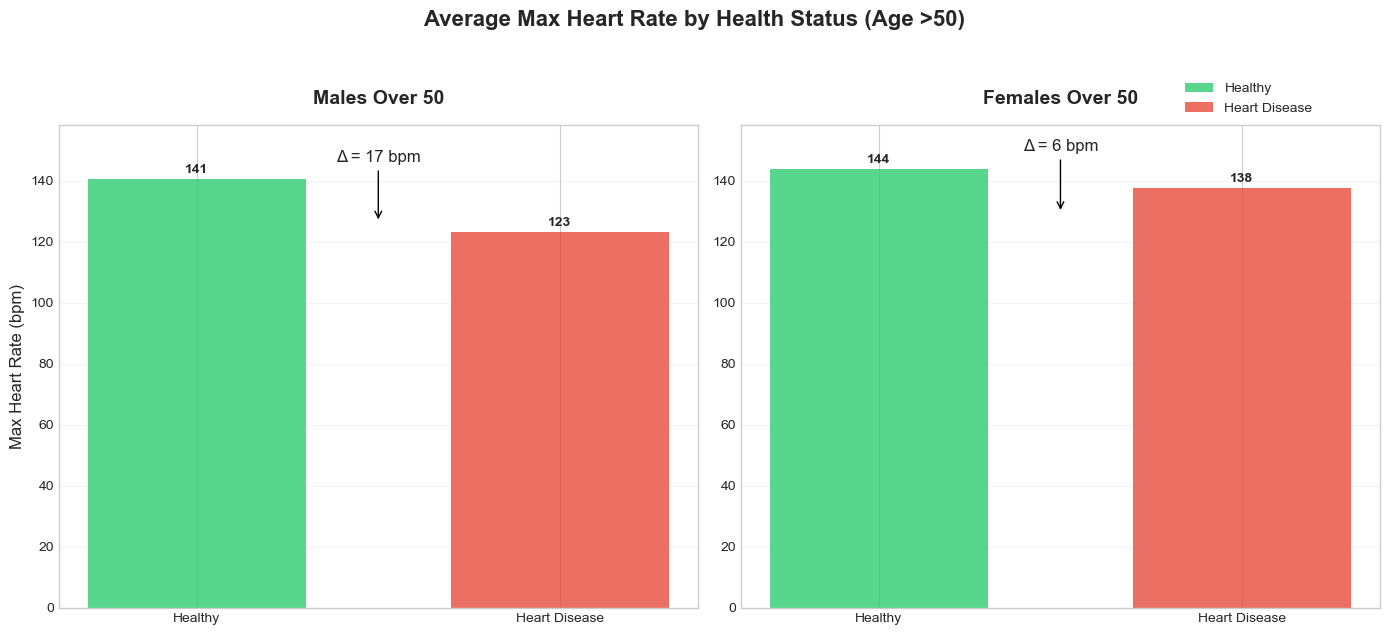

In [30]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Common settings
labels = ['Healthy', 'Heart Disease']
colors = ['#2ecc71', '#e74c3c']  # Green and red
bar_width = 0.6
alpha = 0.8

# Male data
male_values = [
    over_50_male_no_disease['max_heart_rate'].mean(), 
    over_50_male_disease['max_heart_rate'].mean()
]

# Female data
female_values = [
    over_50_female_no_disease['max_heart_rate'].mean(), 
    over_50_female_disease['max_heart_rate'].mean()
]

# Calculate differences for annotations
male_diff = male_values[0] - male_values[1]
female_diff = female_values[0] - female_values[1]

# Male plot
ax1.bar(labels, male_values, color=colors, width=bar_width, alpha=alpha)
ax1.set_title("Males Over 50", fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Max Heart Rate (bpm)', fontsize=12)
ax1.grid(axis='y', alpha=0.2)
ax1.set_ylim(0, max(male_values + female_values) * 1.1)

# Add value labels and difference arrow
for i, v in enumerate(male_values):
    ax1.text(i, v + 2, f"{v:.0f}", ha='center', fontweight='bold')
ax1.annotate(f"Δ = {male_diff:.0f} bpm", xy=(0.5, max(male_values)*0.9), xytext=(0.5, max(male_values)*1.05), ha='center', va='center', arrowprops=dict(arrowstyle="->", color='black'),fontsize=12)

# Female plot
ax2.bar(labels, female_values, color=colors, width=bar_width, alpha=alpha)
ax2.set_title("Females Over 50", fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.2)
ax2.set_ylim(0, max(male_values + female_values) * 1.1)

# Add value labels and difference arrow
for i, v in enumerate(female_values):
    ax2.text(i, v + 2, f"{v:.0f}", ha='center', fontweight='bold')
ax2.annotate(f"Δ = {female_diff:.0f} bpm", xy=(0.5, max(female_values)*0.9), xytext=(0.5, max(female_values)*1.05), ha='center', va='center', arrowprops=dict(arrowstyle="->", color='black'), fontsize=12)

fig.suptitle("Average Max Heart Rate by Health Status (Age >50)", fontsize=16, fontweight='bold', y=1.05)

# Add legend
healthy_patch = plt.Rectangle((0,0),1,1,fc='#2ecc71', alpha=alpha)
disease_patch = plt.Rectangle((0,0),1,1,fc='#e74c3c', alpha=alpha)
fig.legend([healthy_patch, disease_patch], ['Healthy', 'Heart Disease'], loc='upper right', bbox_to_anchor=(0.95, 0.95), framealpha=1)

plt.tight_layout()
plt.savefig('heart_rate_comparison_gender.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
df.head()

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [32]:
over_50_male_disease = over_50_male_disease.copy()
over_50_male_no_disease = over_50_male_no_disease.copy()

over_50_male_disease.loc[:, "health status"] = "Heart Disease"
over_50_male_no_disease.loc[:, "health status"] = "No Heart Disease"

In [33]:
over_50_male_disease.head(2)

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
11   58    1                2           136          164                    0   
18   60    1                4           100          248                    0   

    resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  \
11            1              99                1      2.0         2       1   
18            0             125                0      1.0         2       1   

    health status  
11  Heart Disease  
18  Heart Disease

In [34]:
over_50_male_no_disease.head(2)

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
4   54    1                3           150          195                    0   
7   54    1                2           110          208                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  \
4            0             122                0      0.0         1       0   
7            0             142                0      0.0         1       0   

      health status  
4  No Heart Disease  
7  No Heart Disease

In [35]:
combined_df = pd.concat([over_50_male_disease, over_50_male_no_disease])
combined_df

age  sex  chest_pain_type  resting_bp_s  cholesterol  \
11     58    1                2           136          164   
18     60    1                4           100          248   
30     53    1                3           145          518   
32     54    1                4           125          224   
36     65    1                4           140          306   
...   ...  ...              ...           ...          ...   
1053   52    1                3           138          223   
1162   64    1                1           170          227   
1174   58    1                2           125          220   
1175   56    1                2           130          221   
1176   56    1                2           120          240   

      fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
11                      0            1              99                1   
18                      0            0             125                0   
30                      0            0             130                0   
32                      0            0             122                0   
36                      1            0              87                1   
...                   ...          ...             ...              ...   
1053                    0            0             169                0   
1162                    0            2             155                0   
1174                    0            0             144                0   
1175                    0            2             163                0   
1176                    0            0             169                0   

      oldpeak  ST_slope  target     health status  
11        2.0         2       1     Heart Disease  
18        1.0         2       1     Heart Disease  
30        0.0         2       1     Heart Disease  
32        2.0         2       1     Heart Disease  
36        1.5         2       1     Heart Disease  
...       ...       ...     ...               ...  
1053      0.0         1       0  No Heart Disease  
1162      0.6         2       0  No Heart Disease  
1174      0.4         2       0  No Heart Disease  
1175      0.0         1       0  No Heart Disease  
1176      0.0         3       0  No Heart Disease  

[487 rows x 13 columns]

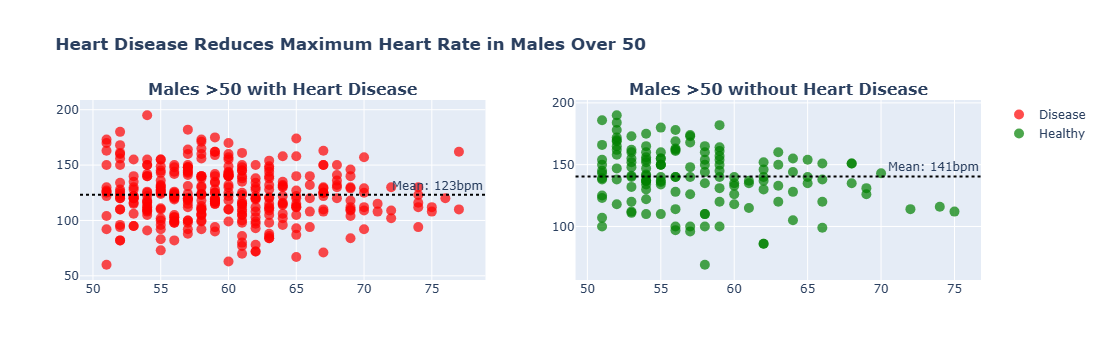

In [36]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Males >50 with Heart Disease</b>", "<b>Males >50 without Heart Disease</b>"))

# Add traces with improved hover info
for col, (df, color, status) in enumerate(zip(
    [over_50_male_disease, over_50_male_no_disease],
    ['red', 'green'],
    ['Disease', 'Healthy']
), 1):
    
    fig.add_trace(
        go.Scatter(
            x=df['age'],
            y=df['max_heart_rate'],
            mode='markers',
            marker=dict(color=color, size=10, opacity=0.7),
            name=status,
            hovertemplate=(
                "<b>Age</b>: %{x} years<br>"
                "<b>Max HR</b>: %{y}bpm<br>"
                "<b>Status</b>: " + status +
                "<extra></extra>"
            )
        ),
        row=1, col=col
    )
    
    # Add mean line
    fig.add_hline(
        y=df['max_heart_rate'].mean(),
        line=dict(dash='dot', color='black'),
        annotation_text=f"Mean: {df['max_heart_rate'].mean():.0f}bpm",
        row=1, col=col
    )

# Update layout
fig.update_layout(
    title_text="<b>Heart Disease Reduces Maximum Heart Rate in Males Over 50</b>",
    hoverlabel=dict(bgcolor="white", font_size=12)
)

# Export and show
fig.write_html("heart_analysis.html")  # Interactive version
fig.write_image("heart_analysis.png", width=1200, height=600)  # Static image
fig.write_image("high_res.png", width=1600, height=800, scale=2)
fig.show()

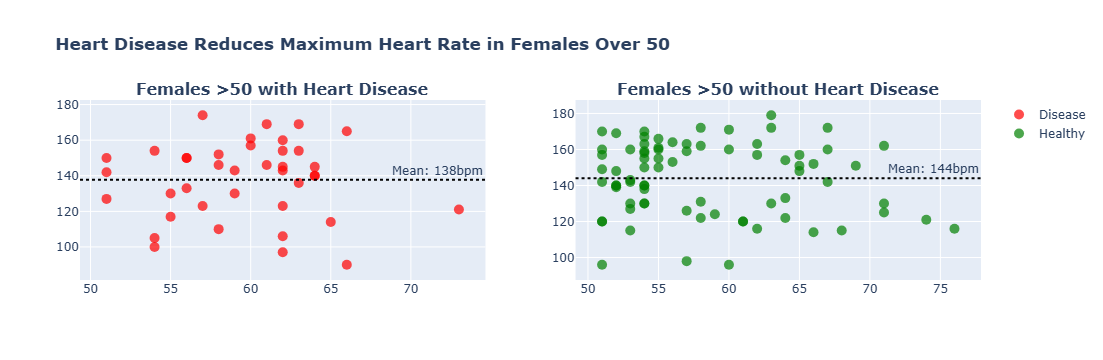

In [37]:
over_50_female_disease = over_50_female_disease.copy()
over_50_female_no_disease = over_50_female_no_disease.copy()

over_50_female_disease.loc[:, "health status"] = "Heart Disease"
over_50_female_no_disease.loc[:, "health status"] = "No Heart Disease"

female_df = pd.concat([over_50_female_disease, over_50_female_no_disease])

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Females >50 with Heart Disease</b>", "<b>Females >50 without Heart Disease</b>"))

# Add traces with improved hover info
for col, (df, color, status) in enumerate(zip(
    [over_50_female_disease, over_50_female_no_disease],
    ['red', 'green'],
    ['Disease', 'Healthy']
), 1):
    
    fig.add_trace(
        go.Scatter(
            x=df['age'],
            y=df['max_heart_rate'],
            mode='markers',
            marker=dict(color=color, size=10, opacity=0.7),
            name=status,
            hovertemplate=(
                "<b>Age</b>: %{x} years<br>"
                "<b>Max HR</b>: %{y}bpm<br>"
                "<b>Status</b>: " + status +
                "<extra></extra>"
            )
        ),
        row=1, col=col
    )
    
    # Add mean line
    fig.add_hline(
        y=df['max_heart_rate'].mean(),
        line=dict(dash='dot', color='black'),
        annotation_text=f"Mean: {df['max_heart_rate'].mean():.0f}bpm",
        row=1, col=col
    )

# Update layout
fig.update_layout(
    title_text="<b>Heart Disease Reduces Maximum Heart Rate in Females Over 50</b>",
    hoverlabel=dict(bgcolor="white", font_size=12)
)

# Export and show
fig.write_html("heart_analysis.html")  # Interactive version
fig.write_image("heart_analysis.png", width=1200, height=600)  # Static image
fig.write_image("high_res_female.png", width=1600, height=800, scale=2)
fig.show()

### DATA MODELLING ========

In [38]:
df.head(3)

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
15   54    0                2           120          273                    0   
28   53    0                2           113          468                    0   
40   54    0                2           150          230                    0   

    resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  \
15            0             150                0      1.5         2       0   
28            0             127                0      0.0         1       0   
40            0             130                0      0.0         1       0   

       health status  
15  No Heart Disease  
28  No Heart Disease  
40  No Heart Disease

In [39]:
###### let us import our cleaned dataset

df = pd.read_csv('cleaned_df.csv')
df.head(2)

age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1

In [40]:
######### split our data into X and y

X = df.drop('target', axis=1)   
y = df['target']

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (734, 11), y_train: (734,)
X_test: (184, 11), y_test: (184,)


In [42]:
#### let us check the class distribution ======

if len(np.unique(y)) > 2:
    print("Class Distribution in y_train", np.unique(y_train, return_counts=True))
    print("Class Distribution in y_test", np.unique(y_test, return_counts=True))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [43]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest" : RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost" : XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, scale_pos_weight=406/328, eval_metric='logloss', random_state=42)
}

In [44]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_metrics = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        ###### make predictions ======
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        ##########
        model_metrics[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred),
            "F1" : f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_proba)
        }
    return pd.DataFrame(model_metrics).T.round(4)

In [45]:
model_metrics = fit_and_score(
    models = models,
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test
)

model_metrics

Accuracy  Precision  Recall      F1  ROC AUC
Logistic Regression    0.8804     0.8774  0.9118  0.8942   0.9010
Random Forest          0.8859     0.8785  0.9216  0.8995   0.9281
XGBoost                0.8859     0.9010  0.8922  0.8966   0.9356

In [46]:
metrics_df = fit_and_score(models, X_train, X_test, y_train, y_test)
print(metrics_df.sort_values("F1", ascending=False))

                     Accuracy  Precision  Recall      F1  ROC AUC
Random Forest          0.8859     0.8785  0.9216  0.8995   0.9281
XGBoost                0.8859     0.9010  0.8922  0.8966   0.9356
Logistic Regression    0.8804     0.8774  0.9118  0.8942   0.9010


#### HYPERPARAMETER TUNING FO RANDOM FOREST AND XGBOOST USING GRIDSEARCHCV =========

In [47]:
from sklearn.model_selection import GridSearchCV

### XGBoost tuning
xgb_params = {
    "learning_rate" : [0.01, 0.1],
    "max_depth" : [3,5],
    "n_estimators" : [100, 200],
    "scale_pos_weight" : [1, 1.24]
}
xgb_grid = GridSearchCV(XGBClassifier(random_state=42),xgb_params, scoring='f1')
xgb_grid.fit(X_train, y_train)
print("Best XGBoost params:", xgb_grid.best_params_)

# Random Forest tuning
rf_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', {0: 1, 1: 1.24}]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, scoring='recall')
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)

Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1.24}
Best Random Forest params: {'class_weight': {0: 1, 1: 1.24}, 'max_depth': None, 'min_samples_split': 5}


In [48]:
##### IMPLEMENTING THE TUNED MODELS ========

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize tuned models with best parameters
tuned_models = {
    "XGBoost (Tuned)": XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        n_estimators=100,
        scale_pos_weight=1.24,
        eval_metric='logloss',
        random_state=42
    ),
    "Random Forest (Tuned)": RandomForestClassifier(
        class_weight={0: 1, 1: 1.24},
        max_depth=None,
        min_samples_split=5,
        random_state=42
    )
}

# Add your original best baseline model for comparison
from sklearn.linear_model import LogisticRegression
baseline_models = {
    "Logistic Regression (Baseline)": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
}

# Combine all models
all_models = {**baseline_models, **tuned_models}

In [49]:
all_models

{'Logistic Regression (Baseline)': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'XGBoost (Tuned)': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'Random Forest (Tuned)': RandomForestClassifier(class_weight={0: 1, 1: 1.24}, min_samples_split=5,
 

In [50]:
#### EVALUATION ============

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    
    for name, model in models.items():
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Store metrics
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        })
    
    return pd.DataFrame(results).set_index('Model')

# Evaluate all models
results_df = evaluate_models(all_models, X_train, X_test, y_train, y_test)
results_df

Accuracy  Precision    Recall        F1  \
Model                                                                     
Logistic Regression (Baseline)  0.880435   0.877358  0.911765  0.894231   
XGBoost (Tuned)                 0.896739   0.902913  0.911765  0.907317   
Random Forest (Tuned)           0.885870   0.878505  0.921569  0.899522   

                                 ROC AUC     Confusion Matrix  
Model                                                          
Logistic Regression (Baseline)  0.901004  [[69, 13], [9, 93]]  
XGBoost (Tuned)                 0.934421  [[72, 10], [9, 93]]  
Random Forest (Tuned)           0.932389  [[69, 13], [8, 94]]

In [51]:
# Sort by F1 score and format for display
display_df = results_df.sort_values('F1', ascending=False)
display_df.style\
    .background_gradient(cmap='Blues', subset=['Accuracy', 'F1', 'ROC AUC'])\
    .format('{:.3f}', subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

# Print detailed classification reports
for name, model in all_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression (Baseline) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


XGBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184


Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.

In [53]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Stratified k-fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === XGBoost Tuning ===
xgb_params_2 = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],
    "scale_pos_weight": [1, 1.2, 1.5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
xgb_grid_2 = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params_2,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
xgb_grid_2.fit(X_train, y_train)
print("Best XGBoost params:", xgb_grid_2.best_params_)

# === Random Forest Tuning ===
rf_params_2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 1.24}]
}
rf_grid_2 = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params_2,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)
rf_grid_2.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid_2.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1.5, 'subsample': 0.8}
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Random Forest params: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [54]:
##### IMPLEMENTING THE SECOND TUNED MODELS ========

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize tuned models with best parameters
tuned_models_2 = {
    "XGBoost (2 Tuned)": XGBClassifier(
        colsample_bytree = 1.0,
        learning_rate=0.05,
        max_depth=3,
        n_estimators=100,
        scale_pos_weight=1.5,
        subsample = 0.8
    ),
    "Random Forest (2 Tuned)": RandomForestClassifier(
        class_weight='balanced_subsample',
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        n_estimators = 200,
        random_state=42
    )
}

# Add your original best baseline model for comparison
from sklearn.linear_model import LogisticRegression
baseline_models = {
    "Logistic Regression (Baseline)": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
}

# Combine all models
all_models_2 = {**baseline_models, **tuned_models_2}

In [55]:
all_models_2

{'Logistic Regression (Baseline)': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'XGBoost (2 Tuned)': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'Random Forest (2 Tuned)': RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf

In [56]:
#### EVALUATION ============

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    
    for name, model in models.items():
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Store metrics
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, y_proba),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        })
    
    return pd.DataFrame(results).set_index('Model')

# Evaluate all models
results_df_2 = evaluate_models(all_models_2, X_train, X_test, y_train, y_test)
results_df_2

Accuracy  Precision    Recall        F1  \
Model                                                                     
Logistic Regression (Baseline)  0.880435   0.877358  0.911765  0.894231   
XGBoost (2 Tuned)               0.885870   0.864865  0.941176  0.901408   
Random Forest (2 Tuned)         0.907609   0.904762  0.931373  0.917874   

                                 ROC AUC     Confusion Matrix  
Model                                                          
Logistic Regression (Baseline)  0.901004  [[69, 13], [9, 93]]  
XGBoost (2 Tuned)               0.933166  [[67, 15], [6, 96]]  
Random Forest (2 Tuned)         0.926351  [[72, 10], [7, 95]]

In [57]:
# Sort by F1 score and format for display
display_df = results_df_2.sort_values('F1', ascending=False)
display_df.style\
    .background_gradient(cmap='Blues', subset=['Accuracy', 'F1', 'ROC AUC'])\
    .format('{:.3f}', subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'])

# Print detailed classification reports
for name, model in all_models_2.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression (Baseline) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


XGBoost (2 Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184


Random Forest (2 Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        82
           1       0.90      0.93      0.92       102

    accuracy                         

In [58]:
display_df

Accuracy  Precision    Recall        F1  \
Model                                                                     
Random Forest (2 Tuned)         0.907609   0.904762  0.931373  0.917874   
XGBoost (2 Tuned)               0.885870   0.864865  0.941176  0.901408   
Logistic Regression (Baseline)  0.880435   0.877358  0.911765  0.894231   

                                 ROC AUC     Confusion Matrix  
Model                                                          
Random Forest (2 Tuned)         0.926351  [[72, 10], [7, 95]]  
XGBoost (2 Tuned)               0.933166  [[67, 15], [6, 96]]  
Logistic Regression (Baseline)  0.901004  [[69, 13], [9, 93]]

In [61]:
print("XGBoost Confusion Matrix:")
print(results_df_2.loc['XGBoost (2 Tuned)', 'Confusion Matrix'])

XGBoost Confusion Matrix:
[[67 15]
 [ 6 96]]


In [62]:
print("Random Forest Confusion Matix:")
print(results_df_2.loc['Random Forest (2 Tuned)', 'Confusion Matrix'])

Random Forest Confusion Matix:
[[72 10]
 [ 7 95]]


<Axes: ylabel='Feature'>

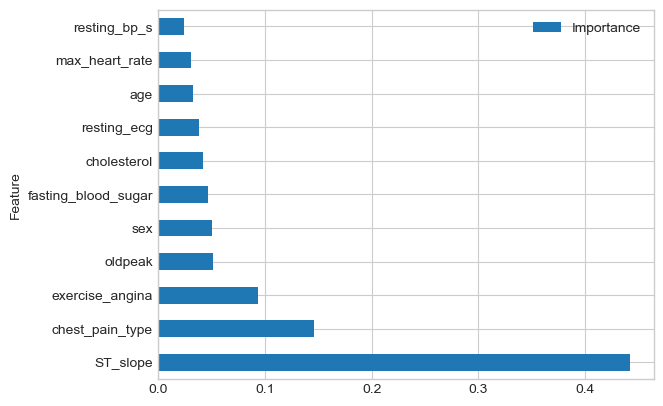

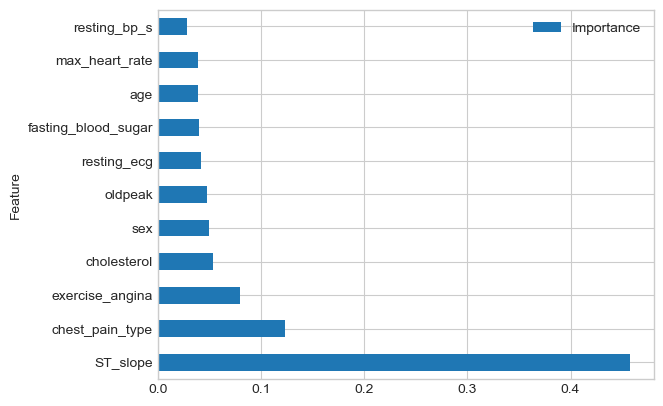

In [63]:
# Feature importance visualization
xgb_model = tuned_models['XGBoost (Tuned)']
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).plot.barh(x='Feature', y='Importance')

# Feature importance visualization
xgb_model_2 = tuned_models_2['XGBoost (2 Tuned)']
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model_2.feature_importances_
}).sort_values('Importance', ascending=False).plot.barh(x='Feature', y='Importance')

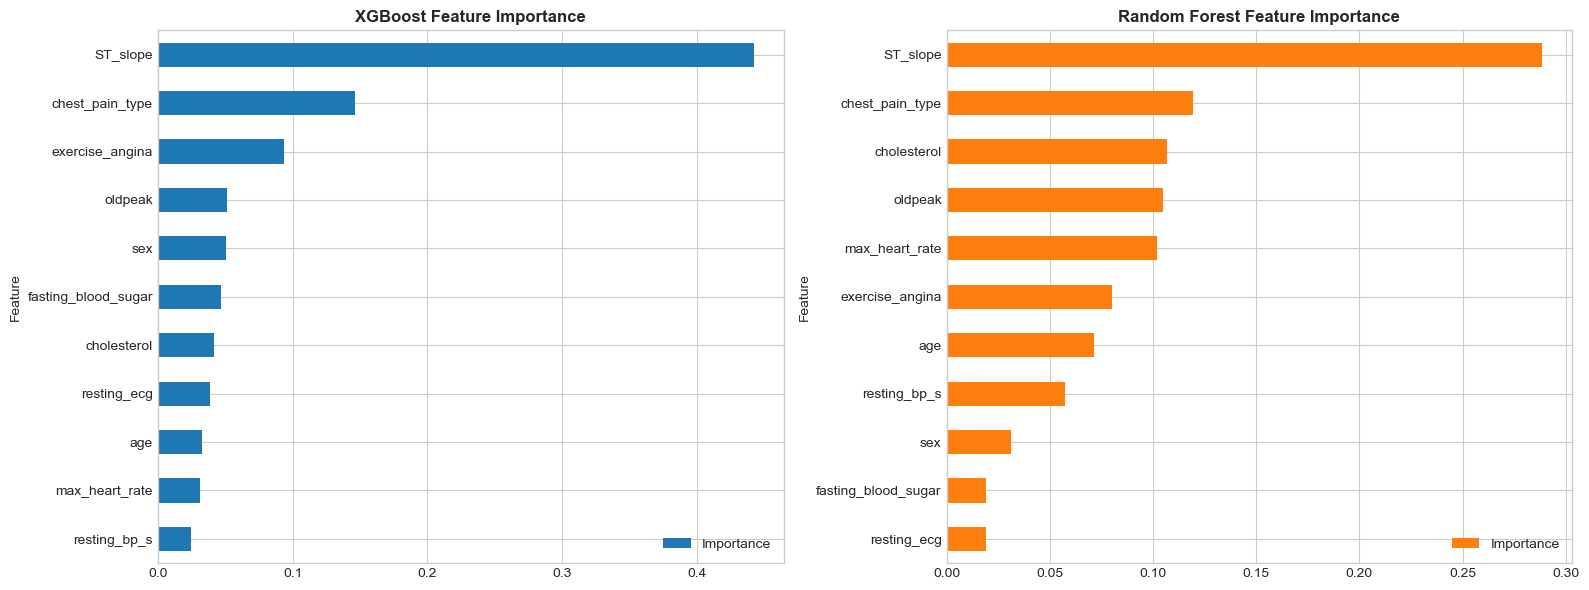

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get trained models
xgb_model = tuned_models['XGBoost (Tuned)'].fit(X_train, y_train)
rf_model = tuned_models['Random Forest (Tuned)'].fit(X_train, y_train)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# XGBoost feature importance
xgb_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)
xgb_imp.plot.barh(x='Feature', y='Importance', ax=ax1, color='#1f77b4')
ax1.set_title('XGBoost Feature Importance', fontweight='bold')

# Random Forest feature importance
rf_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)
rf_imp.plot.barh(x='Feature', y='Importance', ax=ax2, color='#ff7f0e')
ax2.set_title('Random Forest Feature Importance', fontweight='bold')

plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

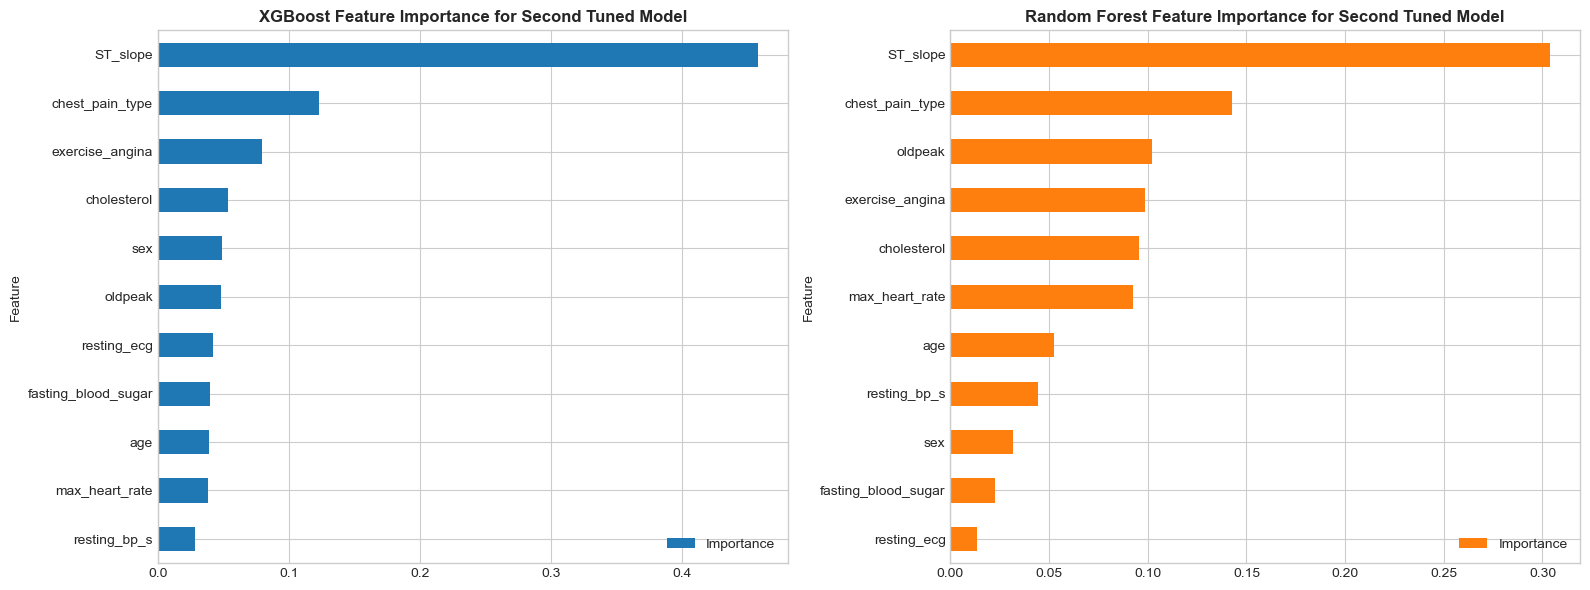

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get trained models
xgb_model_2 = tuned_models_2['XGBoost (2 Tuned)'].fit(X_train, y_train)
rf_model_2 = tuned_models_2['Random Forest (2 Tuned)'].fit(X_train, y_train)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# XGBoost feature importance
xgb_imp_2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model_2.feature_importances_
}).sort_values('Importance', ascending=True)
xgb_imp_2.plot.barh(x='Feature', y='Importance', ax=ax1, color='#1f77b4')
ax1.set_title('XGBoost Feature Importance for Second Tuned Model', fontweight='bold')

# Random Forest feature importance
rf_imp_2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model_2.feature_importances_
}).sort_values('Importance', ascending=True)
rf_imp_2.plot.barh(x='Feature', y='Importance', ax=ax2, color='#ff7f0e')
ax2.set_title('Random Forest Feature Importance for Second Tuned Model', fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance2.png', dpi=300, bbox_inches='tight')
plt.show()

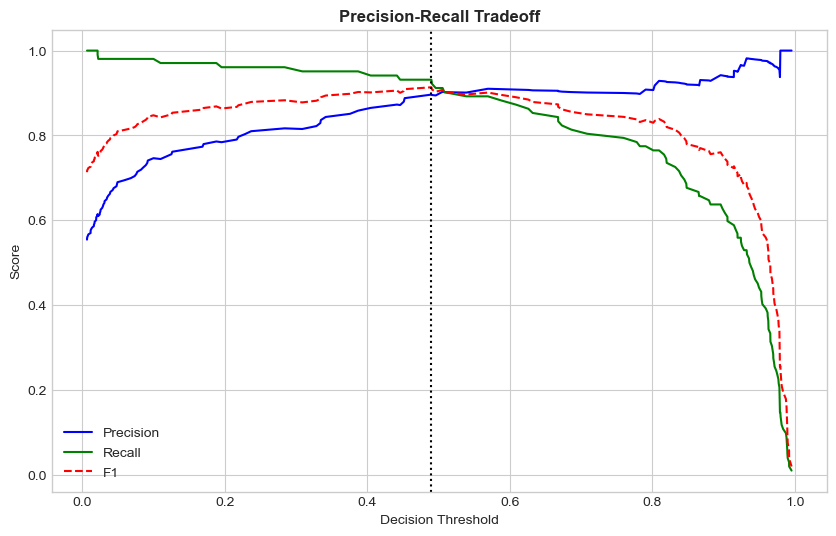

Optimal threshold: 0.490
Max F1-score: 0.913

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        82
           1       0.90      0.93      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [67]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1', color='red', linestyle='--')
plt.axvline(optimal_threshold, color='black', linestyle=':')
plt.title('Precision-Recall Tradeoff', fontweight='bold')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Max F1-score: {f1_scores[optimal_idx]:.3f}")

# Apply optimized threshold
y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

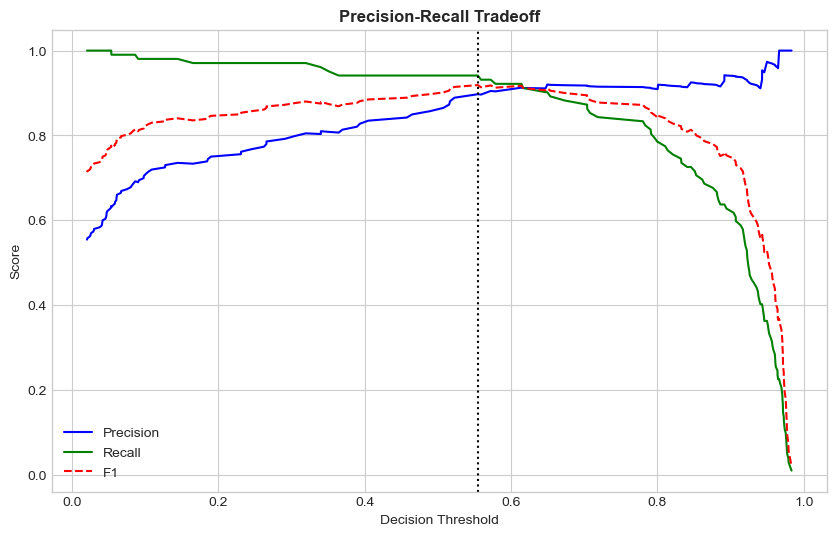

Optimal threshold: 0.555
Max F1-score: 0.919

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        82
           1       0.90      0.94      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



In [68]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_proba = xgb_model_2.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1', color='red', linestyle='--')
plt.axvline(optimal_threshold, color='black', linestyle=':')
plt.title('Precision-Recall Tradeoff', fontweight='bold')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Max F1-score: {f1_scores[optimal_idx]:.3f}")

# Apply optimized threshold
y_pred_optimized = (y_proba >= optimal_threshold).astype(int)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

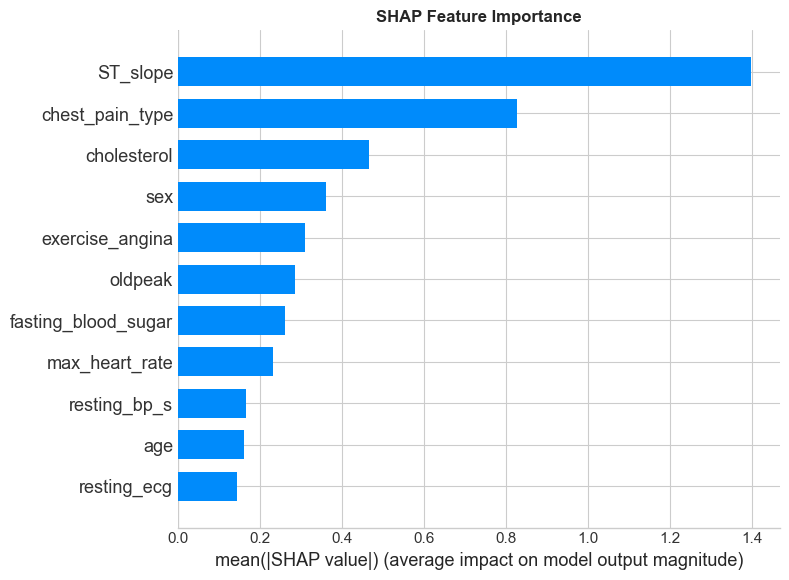

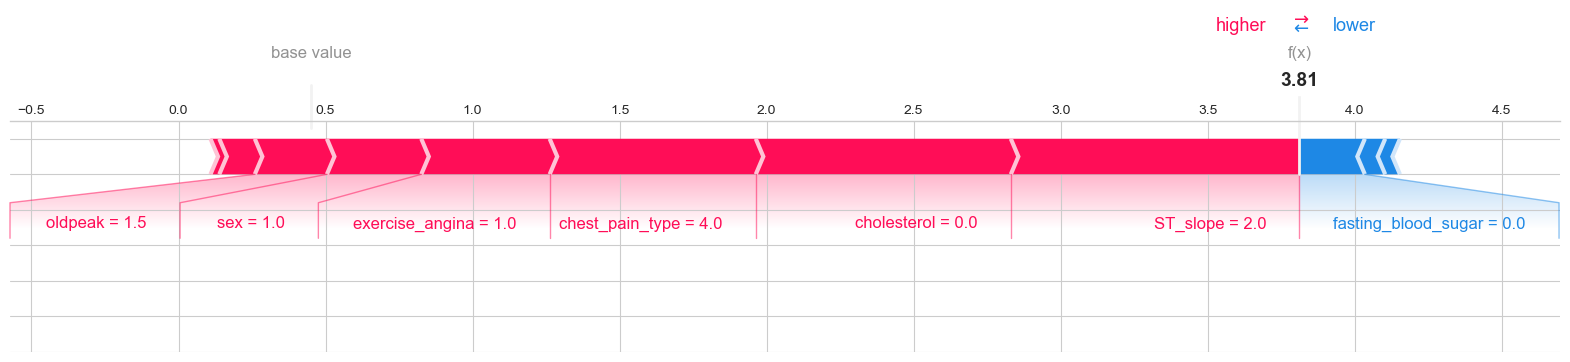

In [69]:
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.title('SHAP Feature Importance', fontweight='bold')
plt.tight_layout()
plt.show()

# Individual prediction explanation
sample_idx = 0  # Change this to see different examples
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx,:],
    X_test.iloc[sample_idx,:],
    matplotlib=True
)

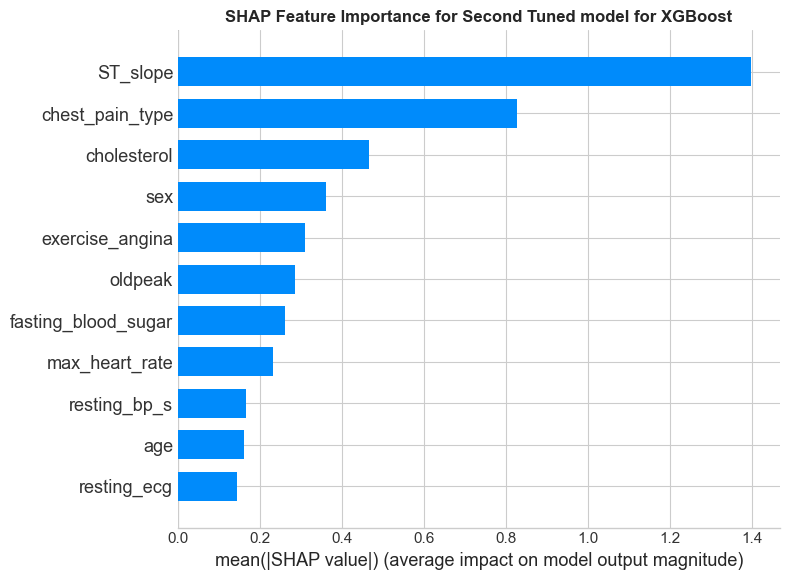

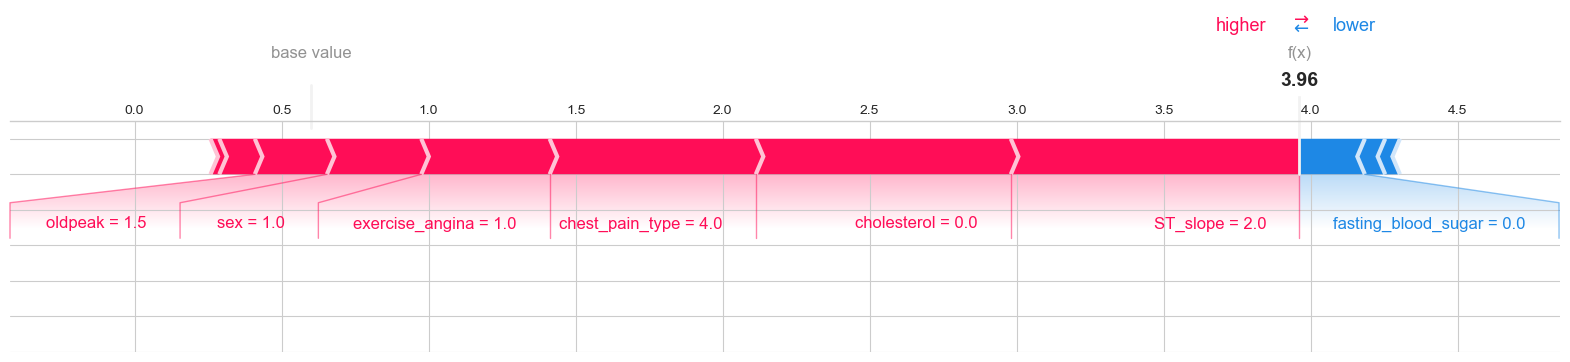

In [70]:
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize SHAP explainer
explainer_2 = shap.TreeExplainer(xgb_model_2)
shap_values_2 = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.title('SHAP Feature Importance for Second Tuned model for XGBoost', fontweight='bold')
plt.tight_layout()
plt.savefig("shap_feature_importance2.png")
plt.show()

# Individual prediction explanation
sample_idx = 0  # Change this to see different examples
shap.force_plot(
    explainer_2.expected_value,
    shap_values_2[sample_idx,:],
    X_test.iloc[sample_idx,:],
    matplotlib=True
)

<Axes: ylabel='Feature'>

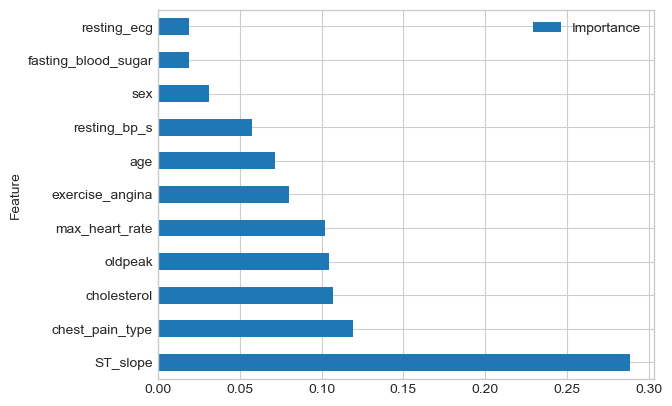

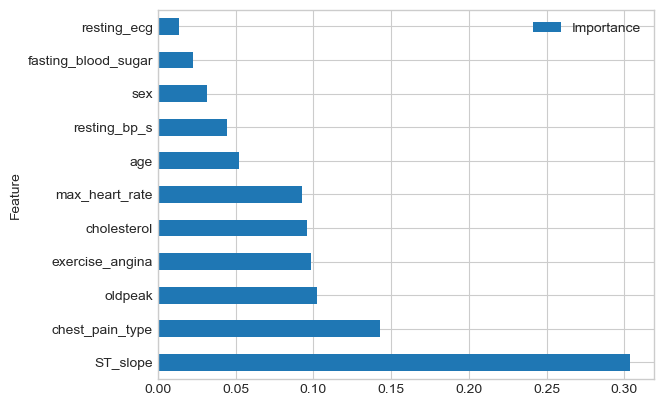

In [72]:
# Feature importance visualization
rf_model = tuned_models['Random Forest (Tuned)']
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).plot.barh(x='Feature', y='Importance')

# Feature importance visualization
rf_model_2 = tuned_models_2['Random Forest (2 Tuned)']
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model_2.feature_importances_
}).sort_values('Importance', ascending=False).plot.barh(x='Feature', y='Importance')

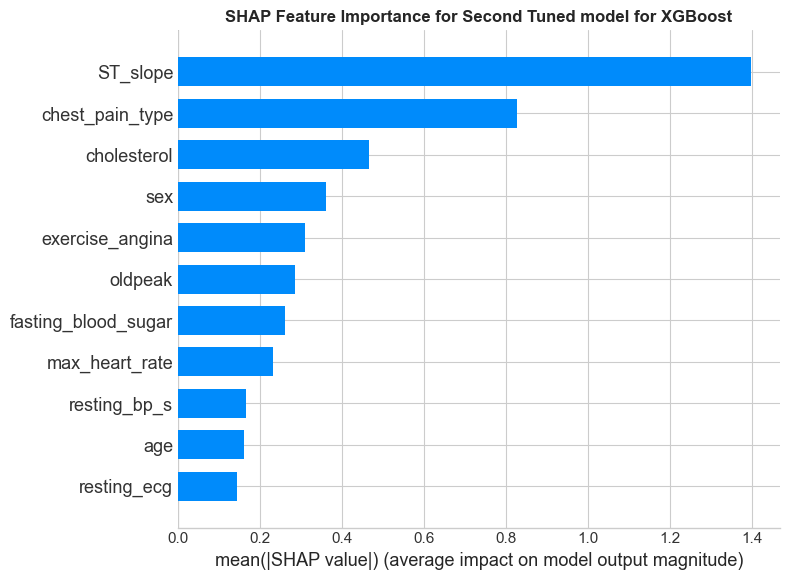

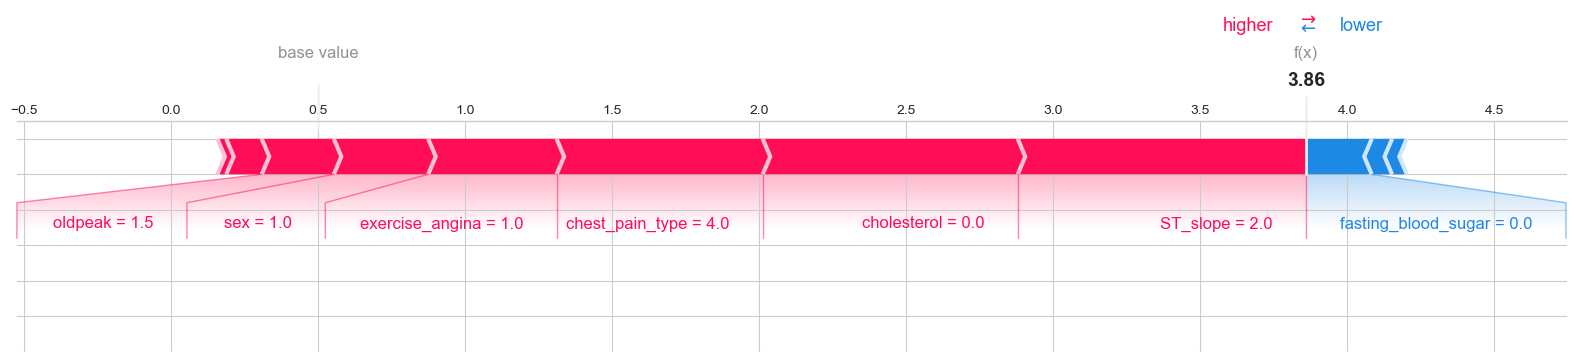

In [75]:
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize SHAP explainer
explainer_2 = shap.TreeExplainer(rf_model_2)
shap_values_2 = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
plt.title('SHAP Feature Importance for Second Tuned model for XGBoost', fontweight='bold')
plt.tight_layout()
plt.savefig("shap_feature_importance2.png")
plt.show()

# Individual prediction explanation
sample_idx = 0  # Change this to see different examples
shap.force_plot(
    explainer_2.expected_value,
    shap_values_2[sample_idx,:],
    X_test.iloc[sample_idx,:],
    matplotlib=True
)

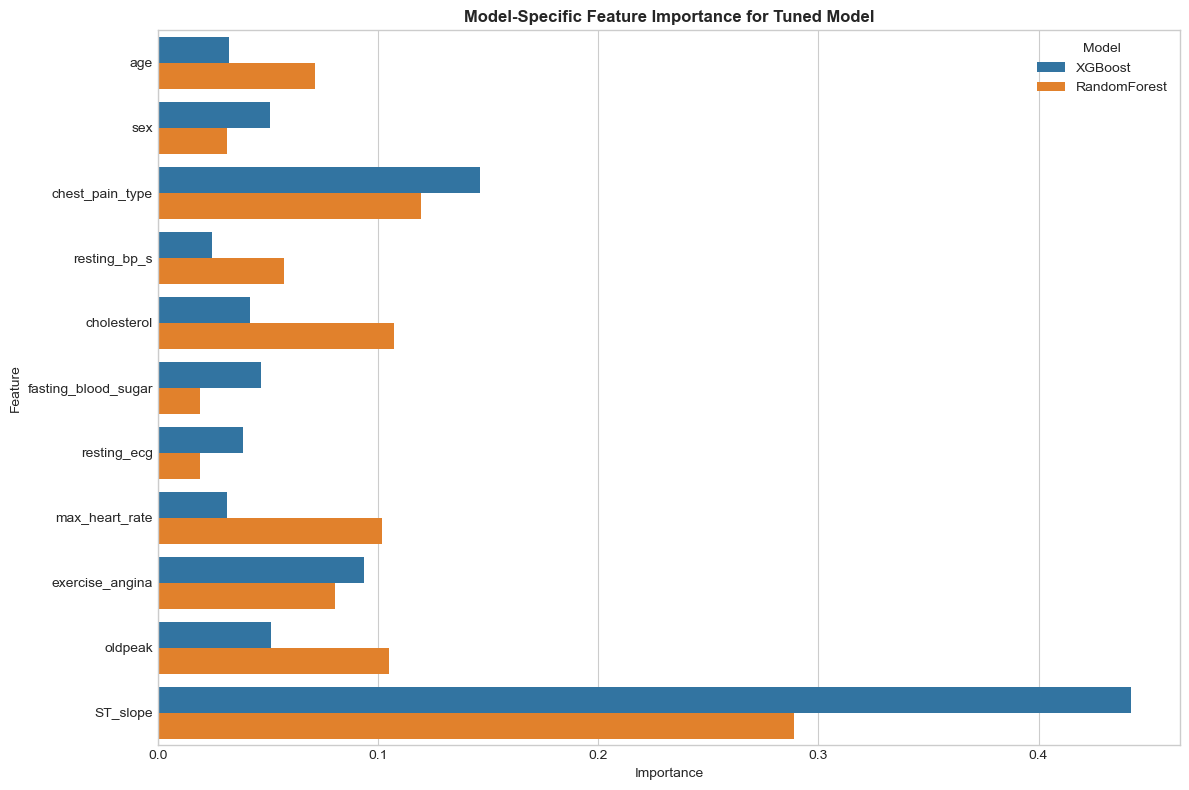

In [76]:
# Compare XGBoost vs Random Forest importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost': xgb_model.feature_importances_,
    'RandomForest': rf_model.feature_importances_
}).melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    y='Feature',
    x='Importance',
    hue='Model',
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Model-Specific Feature Importance for Tuned Model', fontweight='bold')
plt.savefig('feature_importance.png')
plt.tight_layout()

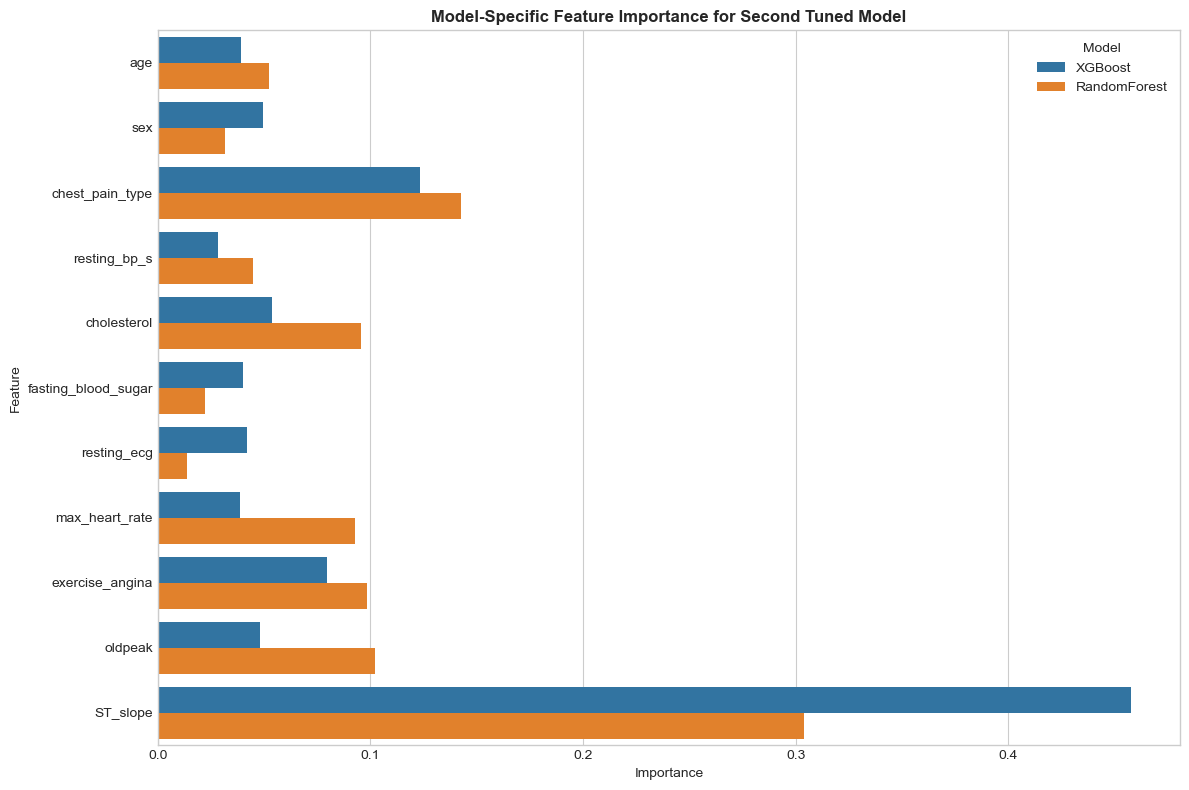

In [130]:
# Compare XGBoost vs Random Forest importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost': xgb_model_2.feature_importances_,
    'RandomForest': rf_model_2.feature_importances_
}).melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    y='Feature',
    x='Importance',
    hue='Model',
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Model-Specific Feature Importance for Second Tuned Model', fontweight='bold')
plt.savefig('feature_importance_2model.png')
plt.tight_layout()
plt.show();

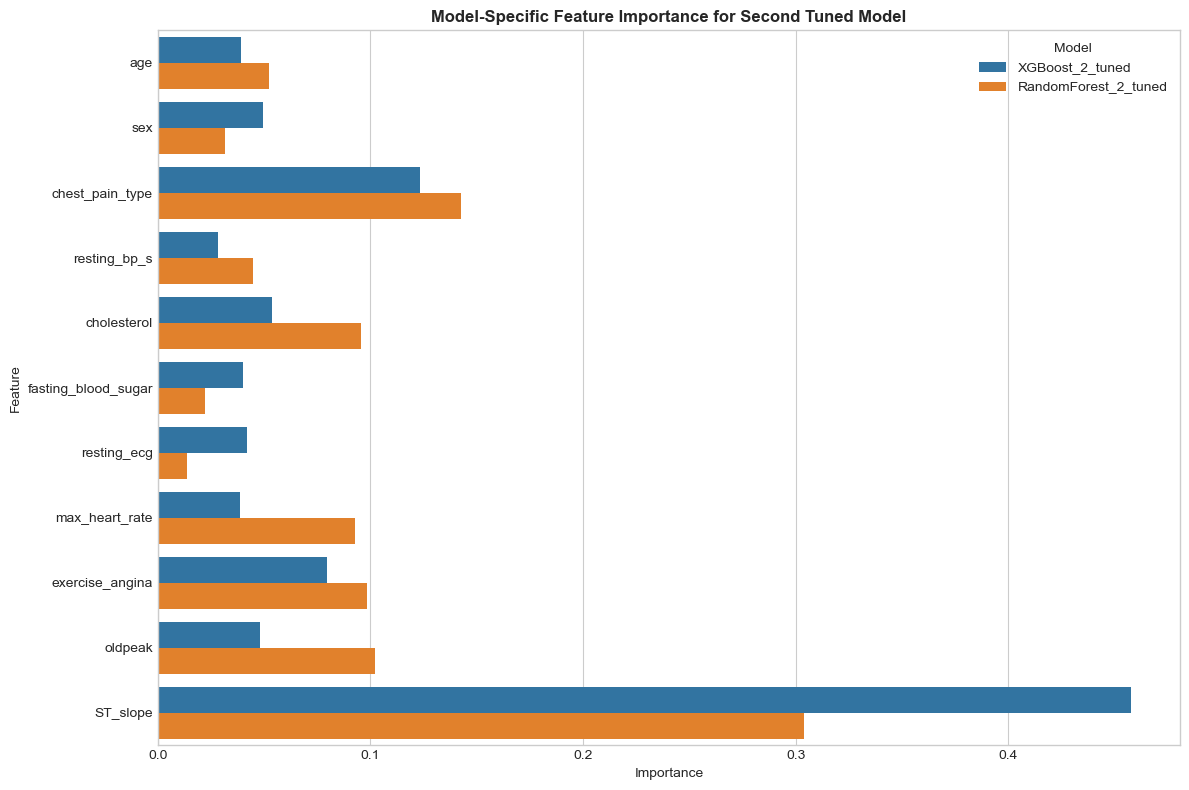

In [78]:
# Compare XGBoost vs Random Forest importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost_2_tuned': xgb_model_2.feature_importances_,
    'RandomForest_2_tuned': rf_model_2.feature_importances_
}).melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    y='Feature',
    x='Importance',
    hue='Model',
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Model-Specific Feature Importance for Second Tuned Model', fontweight='bold')
plt.savefig('feature_importance.png')
plt.tight_layout()

In [79]:
import joblib
from datetime import datetime

# Save models with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
joblib.dump(xgb_model, f'xgb_model_{timestamp}.pkl')
joblib.dump(xgb_model_2, f'xgb_model_{timestamp}.pkl')

joblib.dump(rf_model, f'rf_model_{timestamp}.pkl')
joblib.dump(rf_model_2, f'rf_model_{timestamp}.pkl')

# Save column names for inference
pd.Series(X_train.columns).to_csv(f'model_features_{timestamp}.csv', index=False)

In [80]:
# Best model (Random Forest Tuned v2)
best_model = RandomForestClassifier(
    class_weight='balanced_subsample',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators = 200,
    random_state=42
)

# Retrain on full data (if no further validation needed)
best_model.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

# Save for production
import joblib
joblib.dump(best_model, 'heart_disease_rf_model.pkl')

['heart_disease_rf_model.pkl']

In [81]:
########### saving the features name ============
import joblib
import pandas as pd

feature_names = X_train.columns.tolist()  # Get column names as list

# Save to disk (3 reliable methods)
joblib.dump(feature_names, 'model_features.pkl')         # Method 1: Joblib 
pd.to_pickle(feature_names, 'model_features.pd.pkl')    # Method 2: Pandas
with open('model_features.txt', 'w') as f:              # Method 3: Text file
    f.write('\n'.join(feature_names))

In [82]:
##### let us try to load the feature names of our model =========

feature_names = joblib.load('model_features.pkl')  # If using Method 1

#### for other methods used ========
# feature_names = pd.read_pickle('model_features.pd.pkl')  # Method 2
# with open('model_features.txt') as f: feature_names = f.read().splitlines()  # Method 3

print("Model expects these features:")
print(feature_names)

Model expects these features:
['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'ST_slope']


In [83]:
best_model

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)